<a href="https://colab.research.google.com/github/BhagwatiOracle/Deep-Learning/blob/main/DataScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads (1).csv to Social_Network_Ads (1).csv


In [2]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('/content/Social_Network_Ads (1).csv')

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

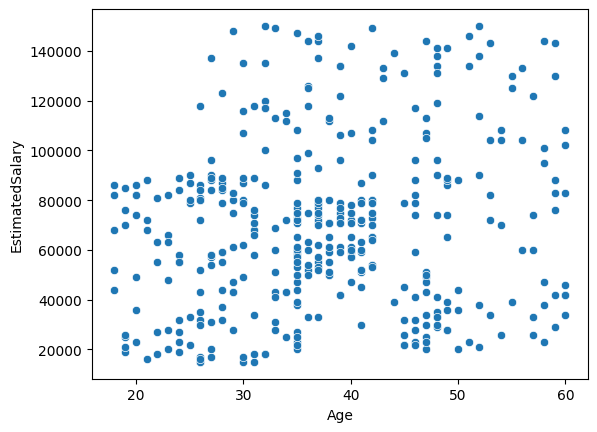

In [16]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42
                                                 )

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3943 - loss: 1898.5005 - val_accuracy: 0.6500 - val_loss: 775.0179
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6178 - loss: 667.9033 - val_accuracy: 0.3500 - val_loss: 534.6934
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3791 - loss: 392.5060 - val_accuracy: 0.6500 - val_loss: 68.1485
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5006 - loss: 106.9019 - val_accuracy: 0.6500 - val_loss: 66.5447
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4983 - loss: 30.8921 - val_accuracy: 0.3500 - val_loss: 36.3243
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5079 - loss: 29.1065 - val_accuracy: 0.6500 - val_loss: 16.1627
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4883 - loss: 31.8703 - val_accuracy: 0.6500 - val_loss: 102.9422
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5876 - loss: 44.4229 

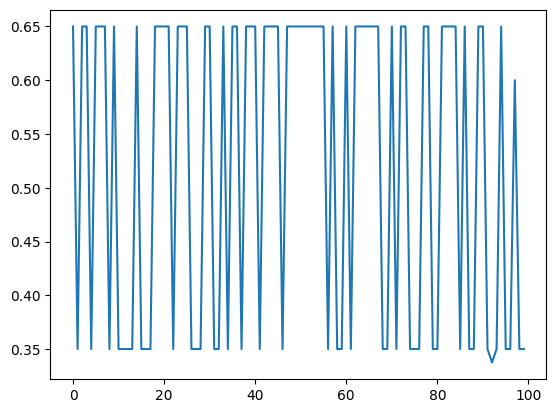

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

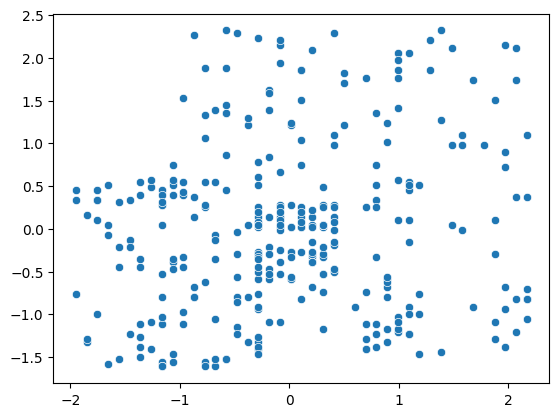

In [27]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])

In [30]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7309 - loss: 0.6706 - val_accuracy: 0.9125 - val_loss: 0.6112
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8498 - loss: 0.6190 - val_accuracy: 0.9000 - val_loss: 0.5527
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8497 - loss: 0.5692 - val_accuracy: 0.9000 - val_loss: 0.5016
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8416 - loss: 0.5377 - val_accuracy: 0.8875 - val_loss: 0.4586
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8700 - loss: 0.4815 - val_accuracy: 0.8875 - val_loss: 0.4197
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8603 - loss: 0.4462 - val_accuracy: 0.9000 - val_loss: 0.3876
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8672 - loss: 0.4233 - val_accuracy: 0.9125 - val_loss: 0.3608
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8323 - loss: 0.4372 - val_accuracy: 0.91

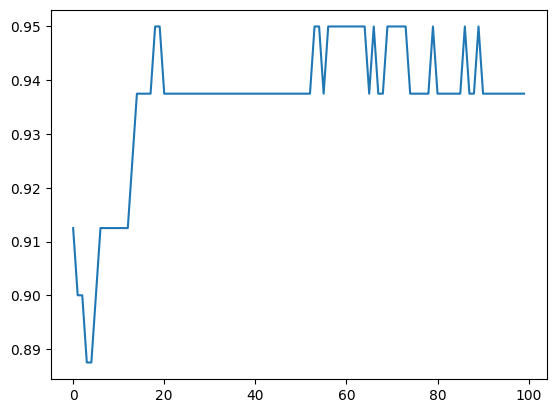

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])